<a href="https://colab.research.google.com/github/simionattovini/thermal-machines/blob/main/Test%20Solutions/MTA_PO_1s2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Máquinas Térmicas A - PO - 1S2024

## Enunciado

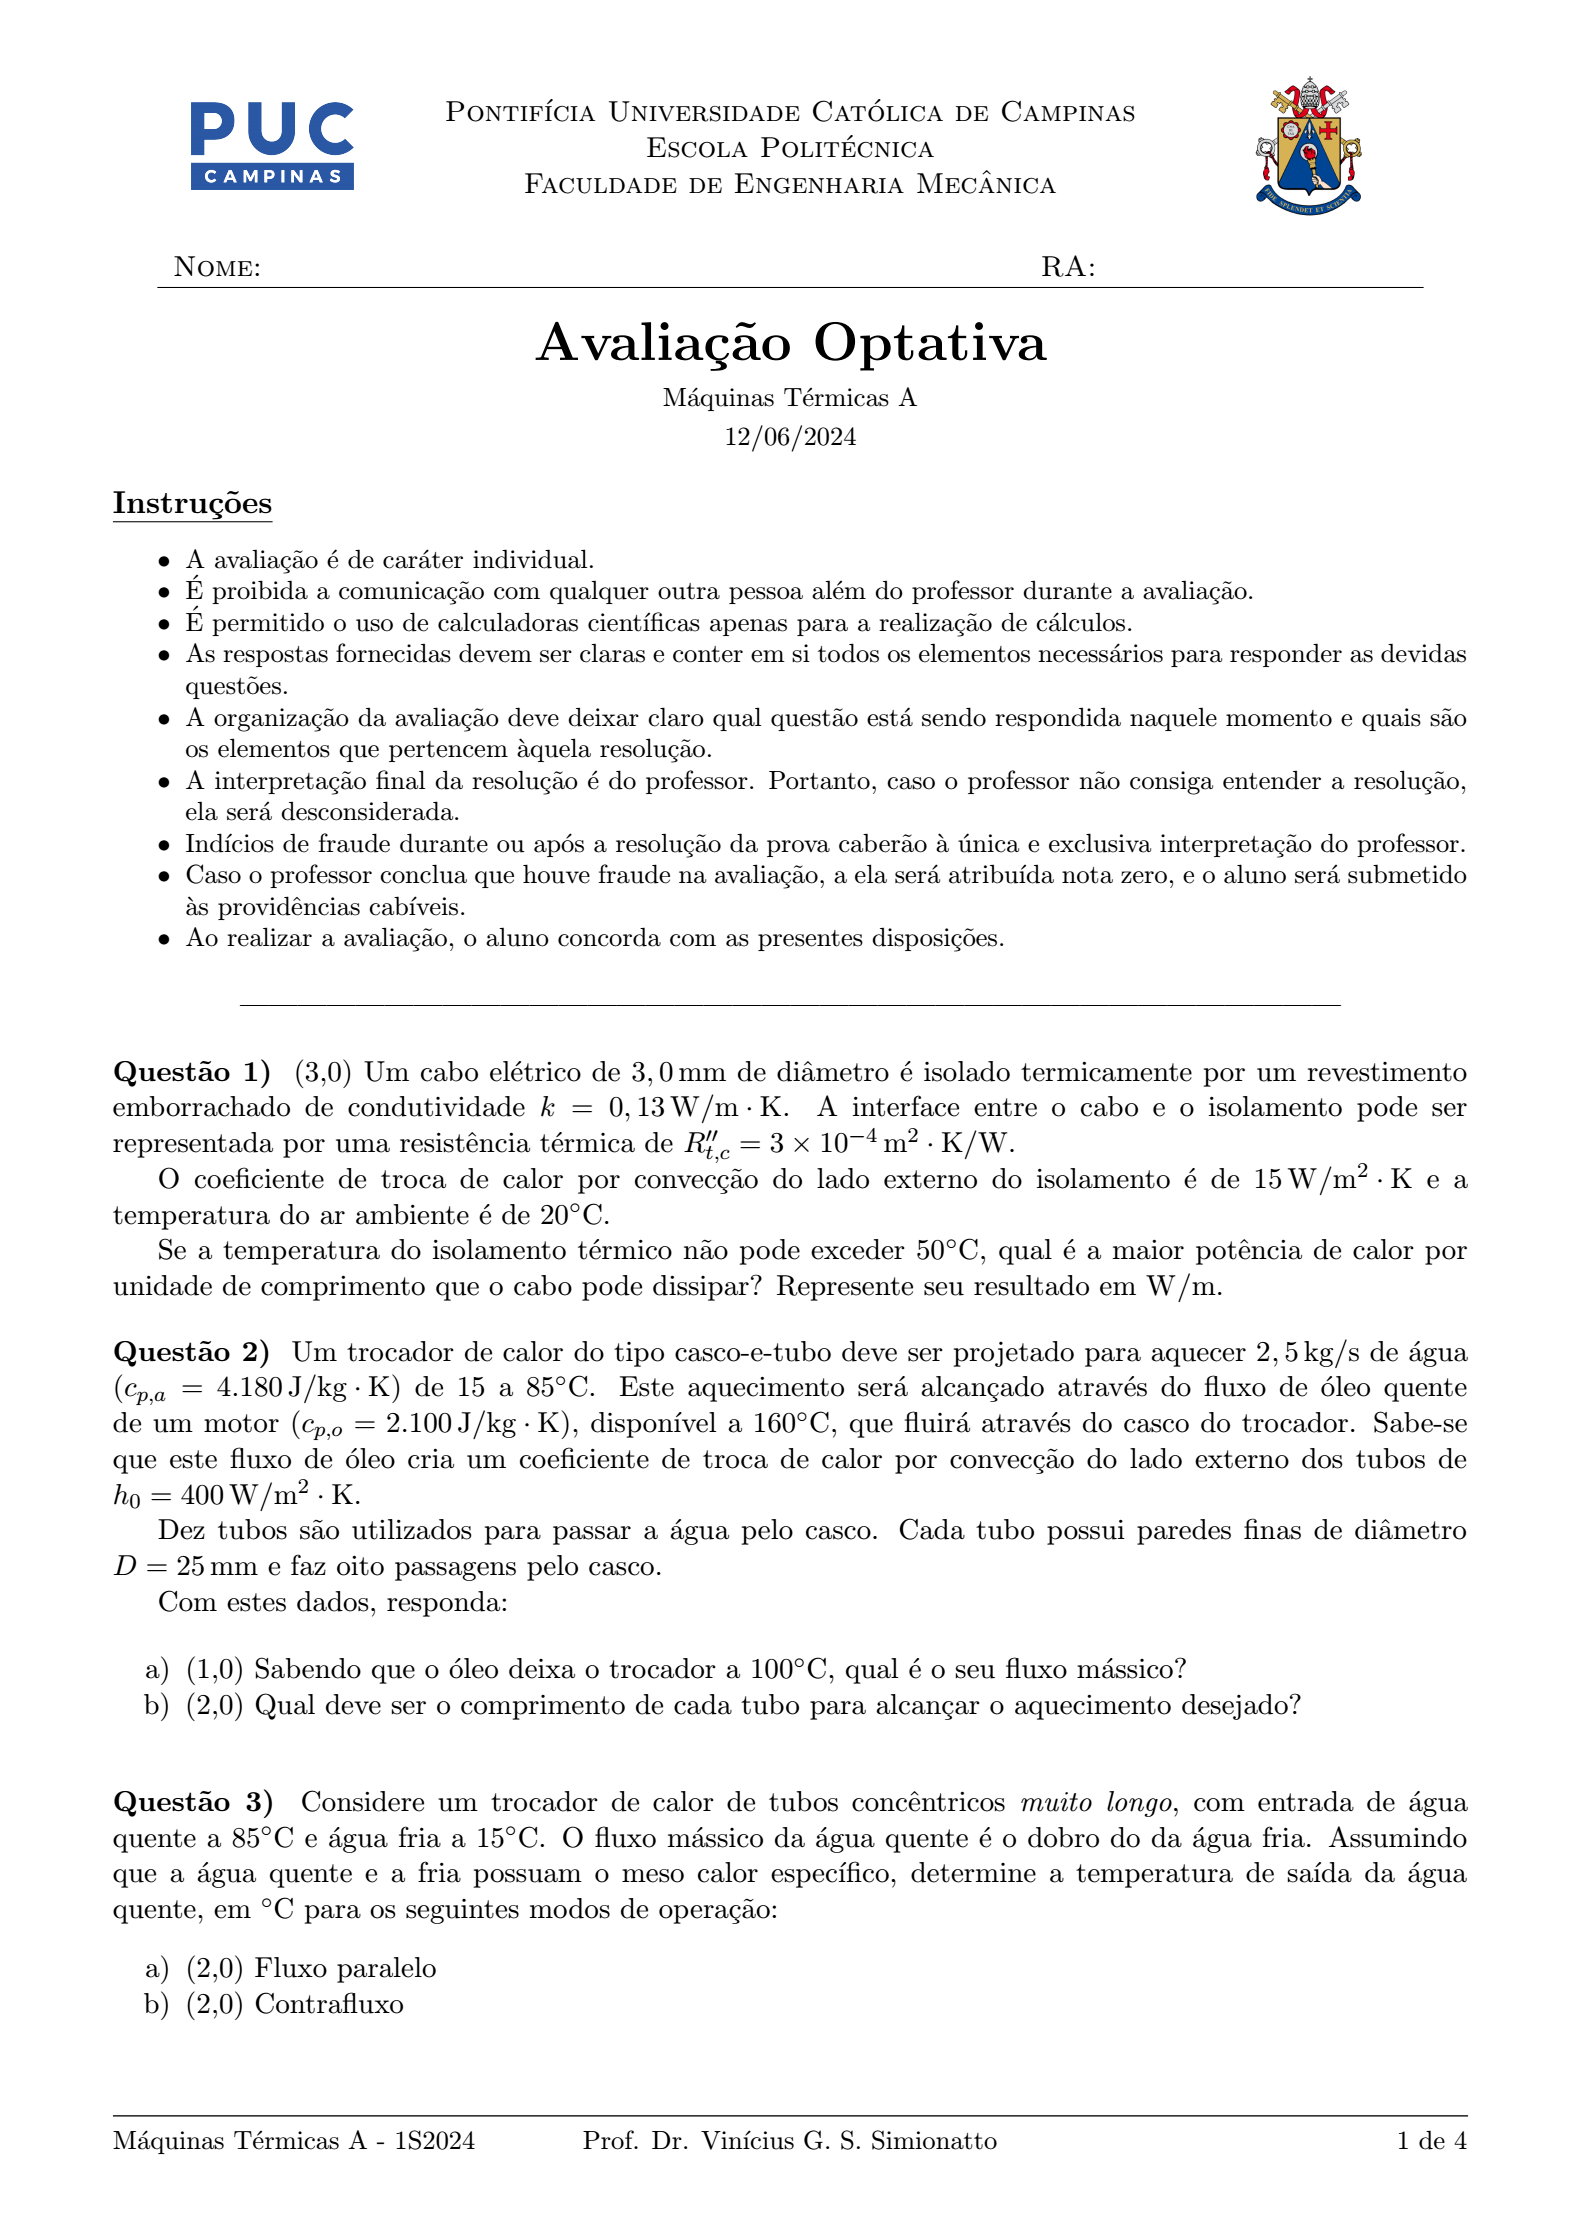

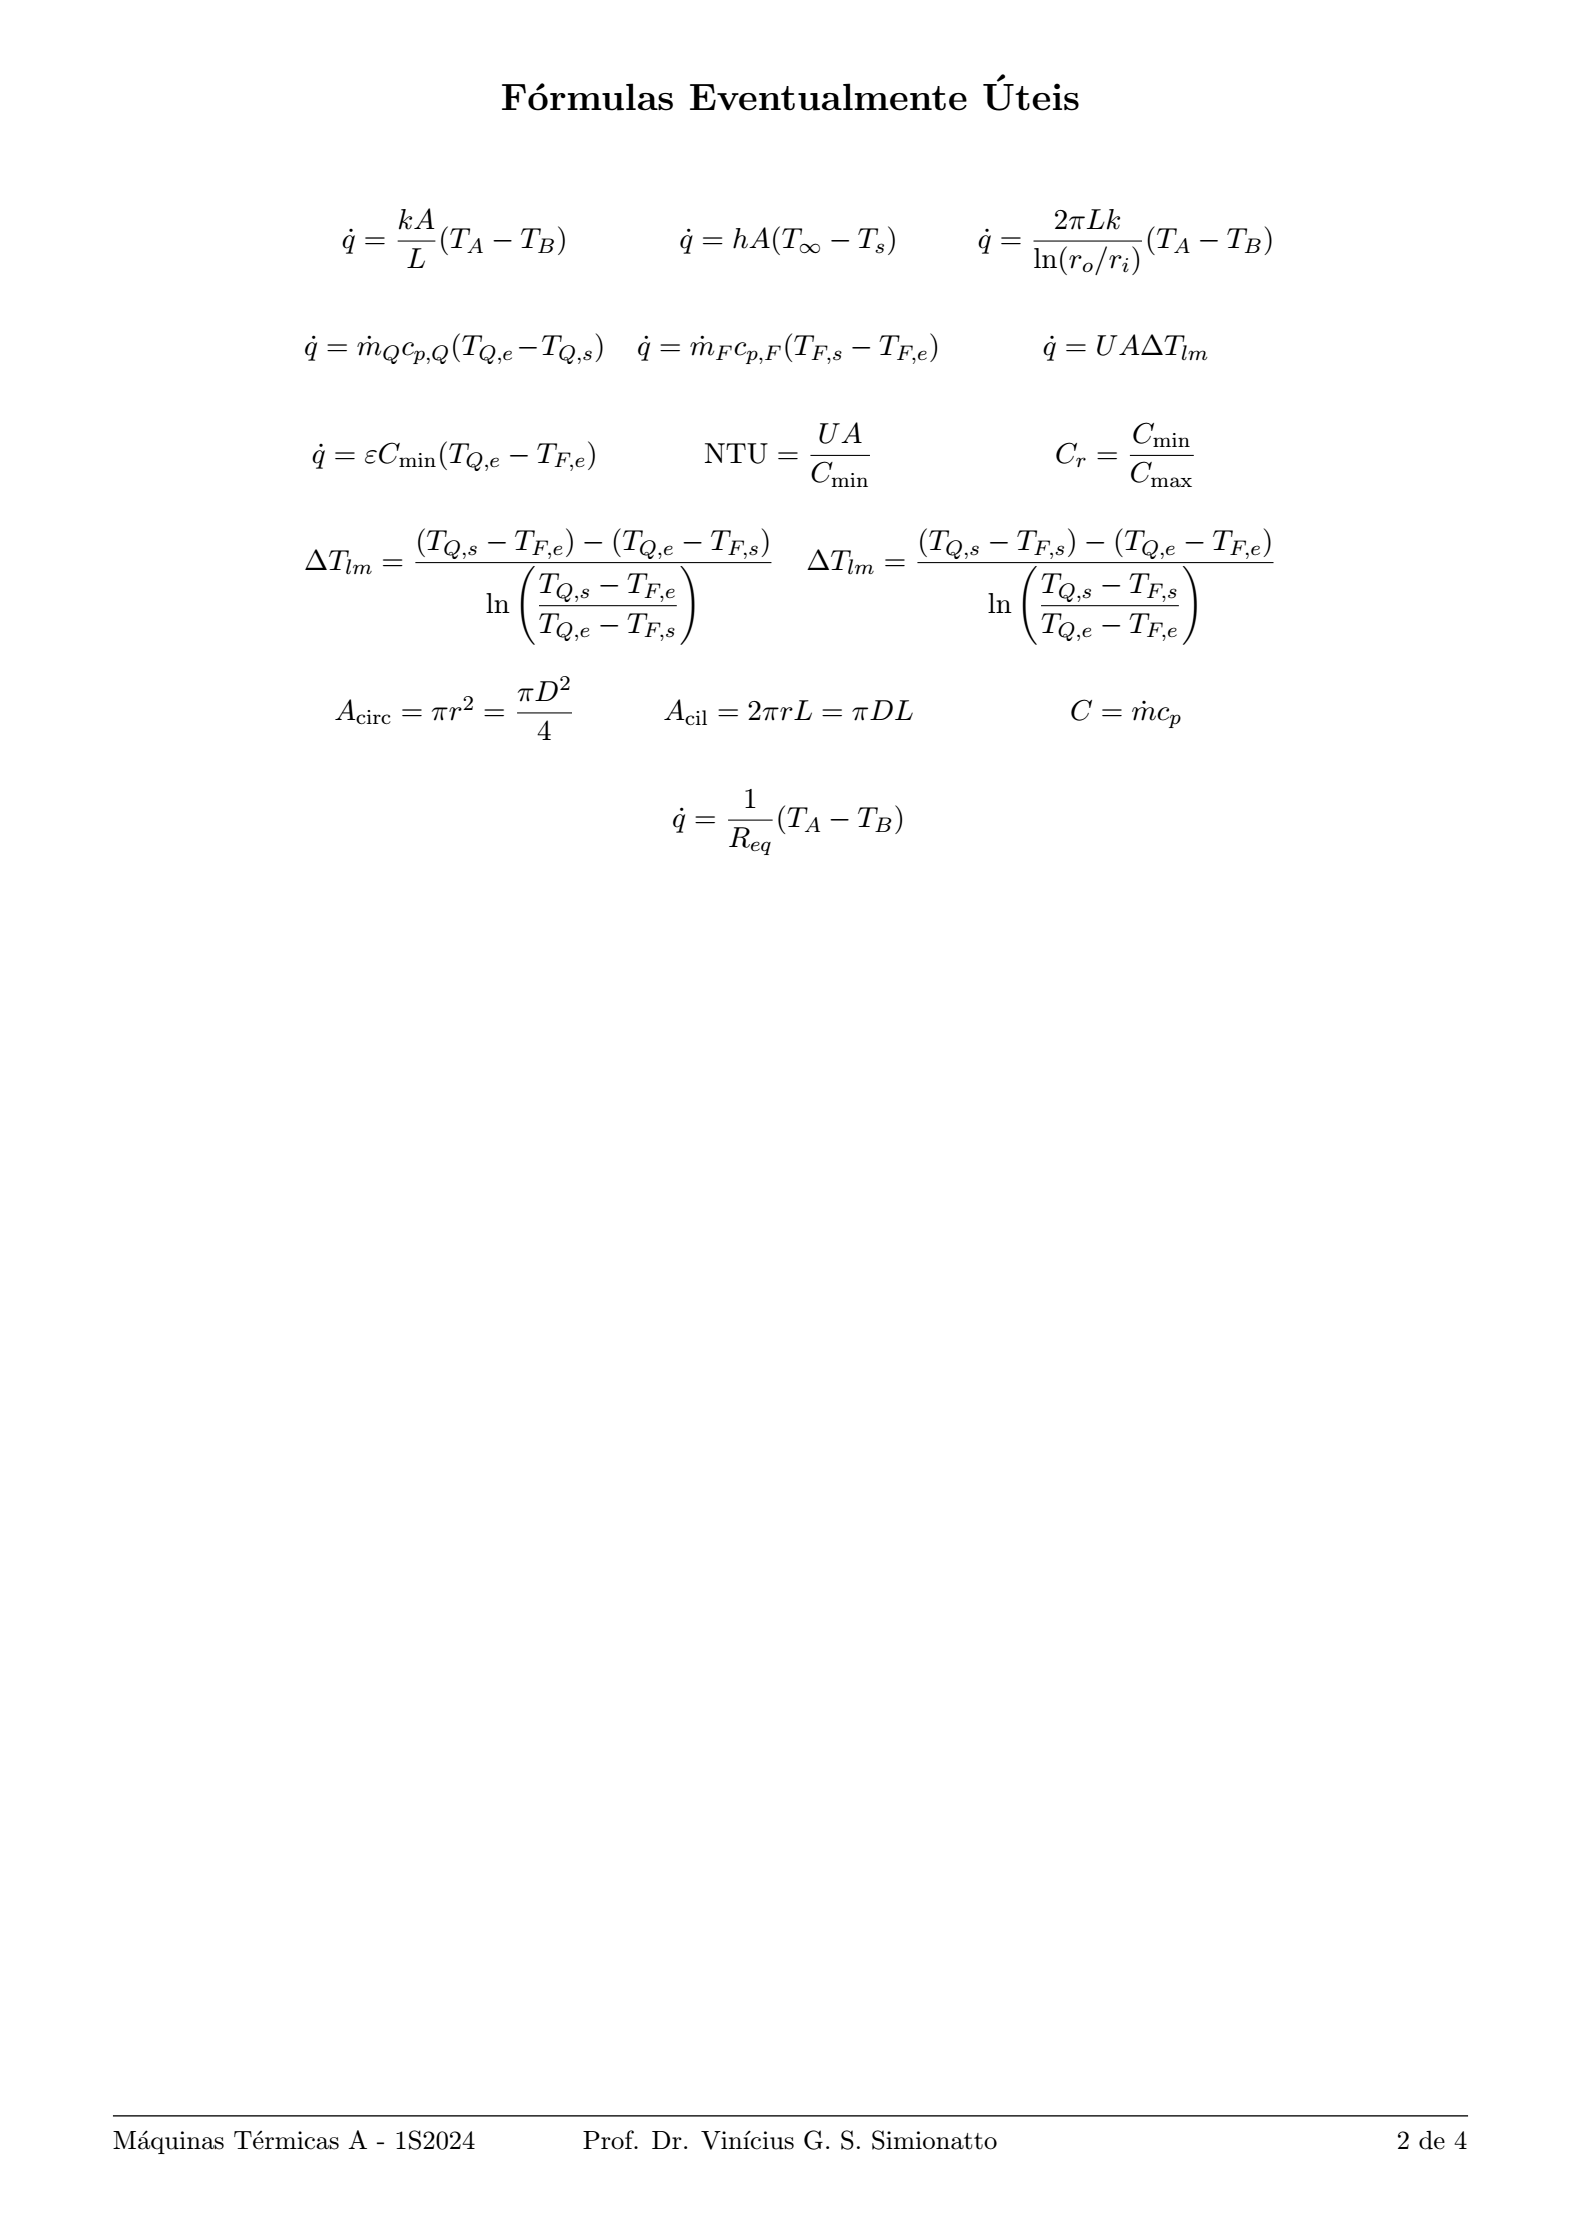

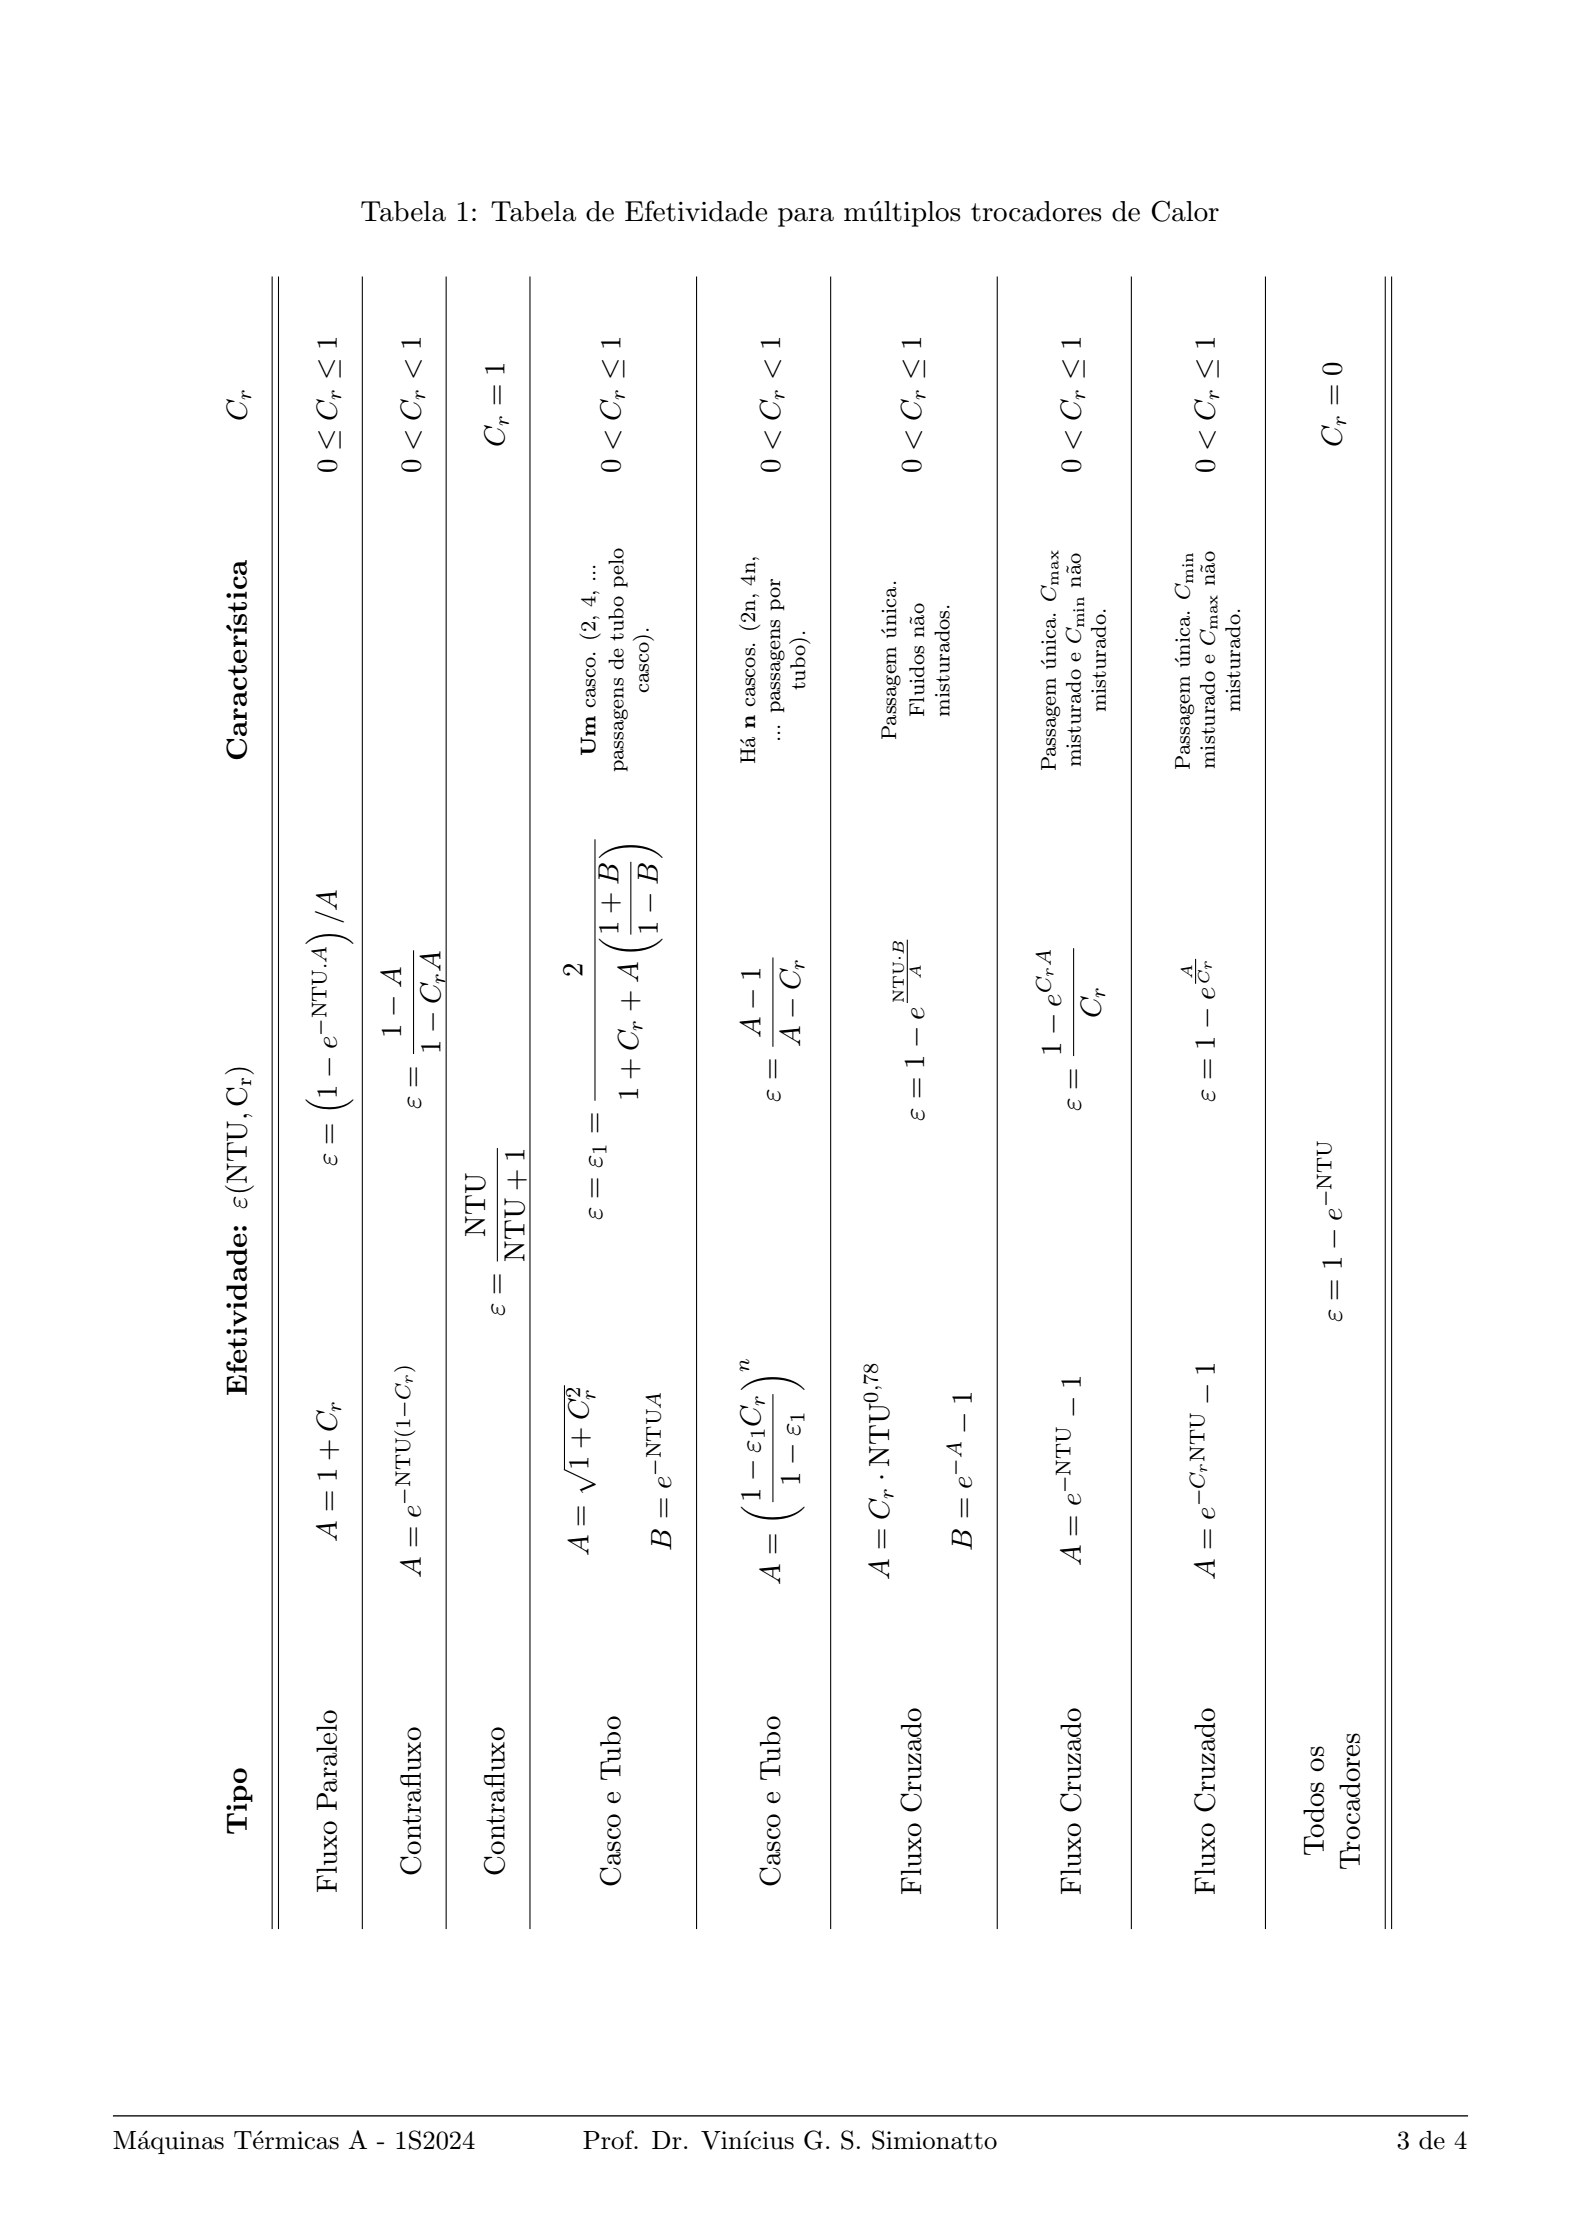

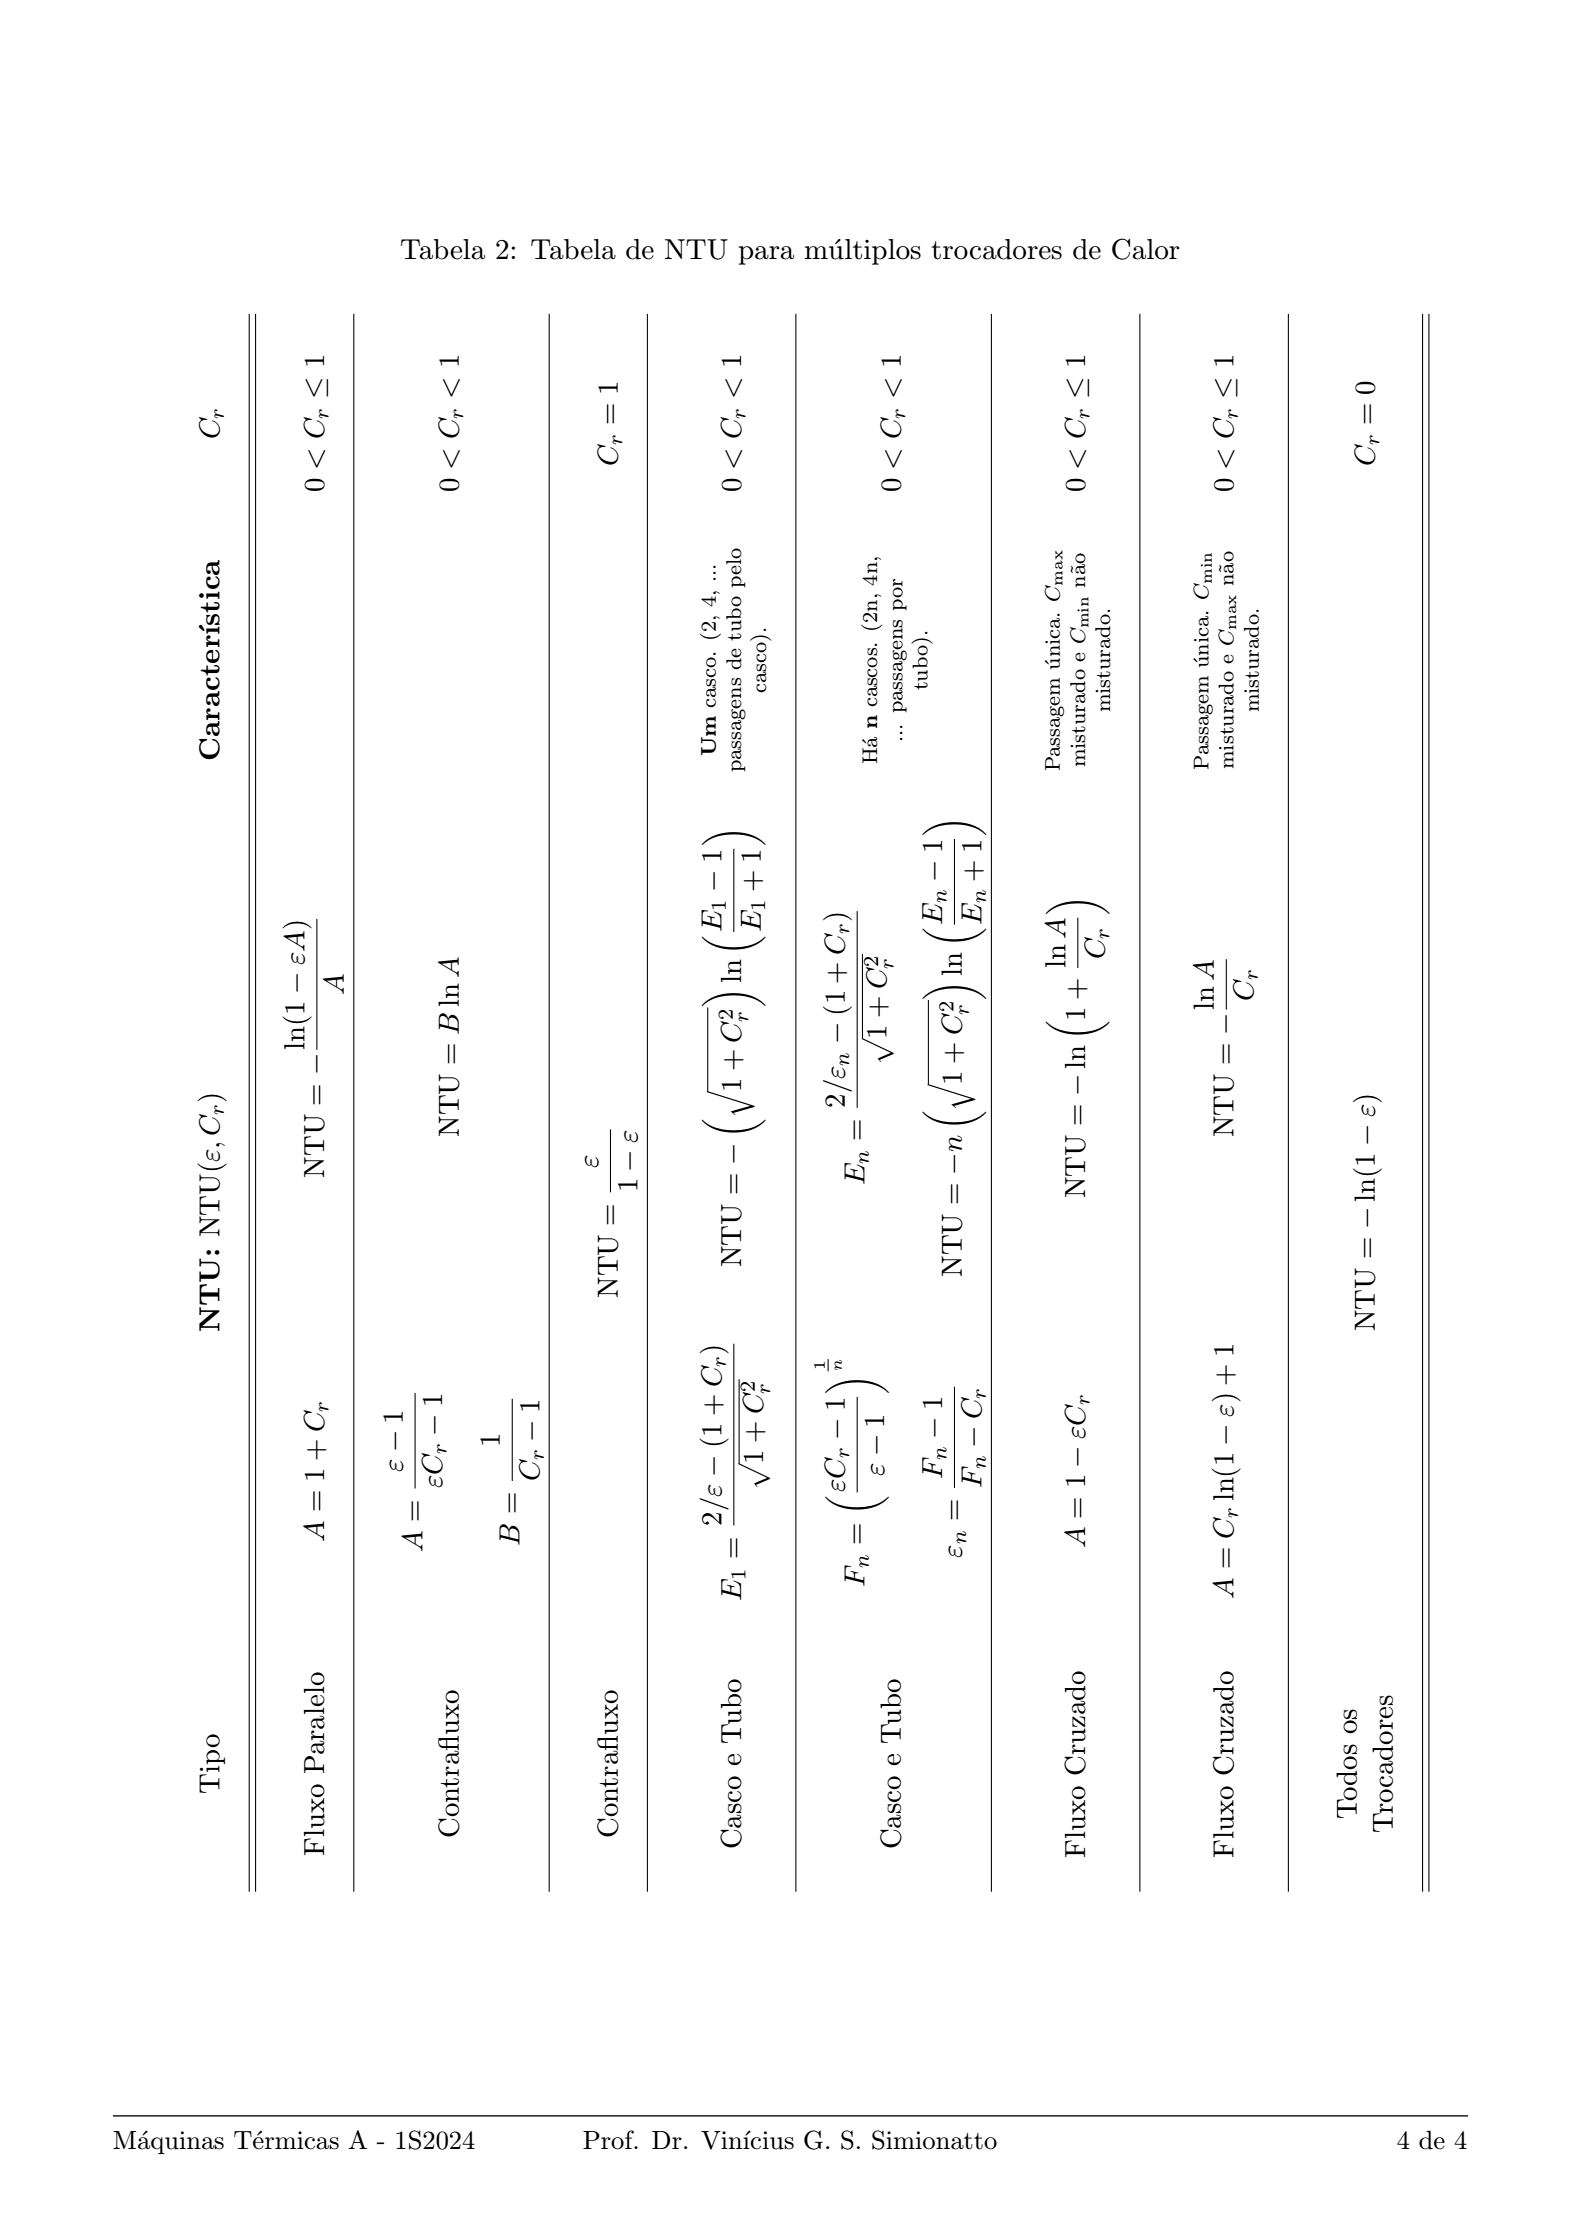

## Resolução

### Questão 1)

Neste exercício há três processos de troca de calor:

1. A troca entre o cabo e a isolação através da resistência de contato
2. A condução radial pelo isolante em torno do cabo
3. A convecção para o meio.

Assim, o processo pode ser descrito pelo diagrama elétrico equivalente a seguir:

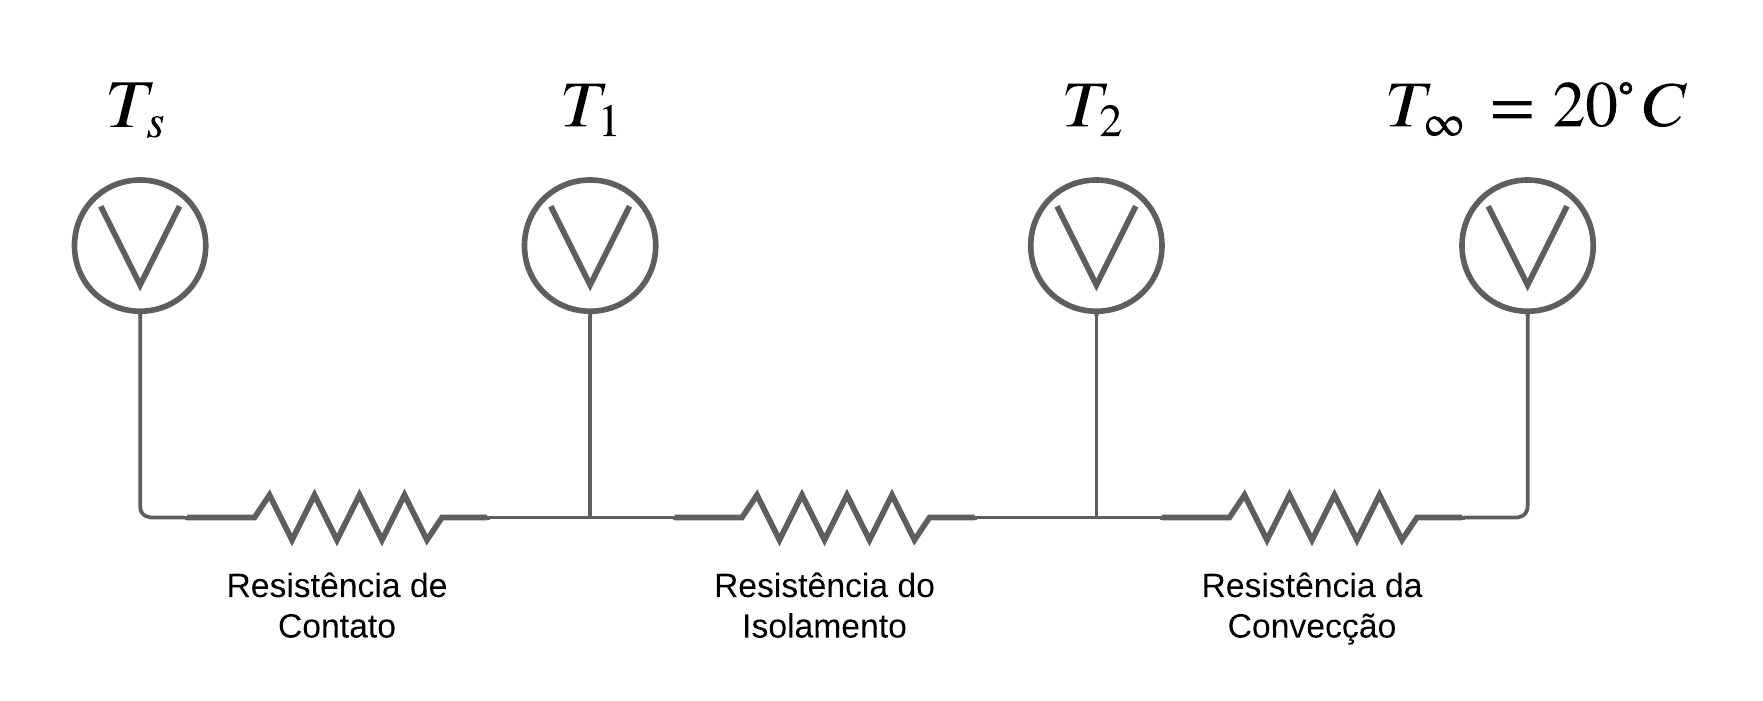

Assim, no caso crítico, a temperatura $T_1$ é de $50^\circ \mathrm{C}$, e $T_2$ deve ser menor do que $T_1$.

A resistência térmica equivalente do ponto onde se mede $T_1$ até o ar é dada por:

$$
R_{eq} = \frac{\ln(r_o/r_i)}{2\pi L k} + \frac{1}{h A_o} = \frac{1}{L}\left(\frac{\ln(r_o/r_i)}{2\pi  k} + \frac{1}{h \pi D_o}\right)
$$

E a quantidade de calor dissipado é dada por:

$$
\dot{q} = \frac{1}{R_{eq}}(T_1-T_\infty)
$$

Assim, a quantidade de calor dissipada por unidade de comprimento é dada por:
$$
\frac{\dot{q}}{L} = \frac{1}{LR_{eq}}(T_1-T_\infty) = \frac{1}{L\displaystyle \left(\frac{1}{L}\right)\left(\frac{\ln(r_o/r_i)}{2\pi  k} + \frac{1}{h \pi D_o}\right)}(T_1-T_\infty) = \frac{T_1-T_\infty}{\displaystyle \left(\frac{\ln(r_o/r_i)}{2\pi  k} + \frac{1}{h \pi D_o}\right)}
$$

Os resultados são mostrados a seguir:

In [ ]:
from numpy import log, pi

Tinf = 20       # °C
T1 = 50         # °C
ri = 1.5e-3     # m
ro = ri + 2e-3  # m
k = 0.13        # W/m.K
h = 15          # W/m².K
Do = 2*ro       # m

dq_L = (T1-Tinf)/(log(ro/ri)/(2*pi*k) + 1/(h*pi*Do))

print(f'dq/L = {dq_L:.2f} W/m')

dq/L = 7.37 W/m


### Questão 2 a)

Para calcular este fluxo é necessário calcular a quantidade de calor trocado entre os fluidos, o que está disponível com os dados da água. Assim, utiliza-se:

$$
\dot{q} = \dot{m}_F c_{p,F} (T_{F,s} - T_{F,e})
$$

O resultado é mostrado a seguir:

In [ ]:
%reset -f

Tfs = 85     # °C
Tfe = 15     # °C
dmf = 2.5    # kg/s
cp_f = 4180  # J/kg.K

dq = dmf*cp_f*(Tfs-Tfe)

print(f'dq = {dq:.2f} W')

dq = 731500.00 W


Com isso calculamos a vazão mássica do óleo:

$$
\dot{q} = \dot{m}_Q c_{p,Q} (T_{Q,e} - T_{Q,s}) \hspace{10mm} \therefore \hspace{10mm} \dot{m}_Q = \frac{\dot{q}}{c_{p,Q} (T_{Q,e} - T_{Q,s})}
$$

O resultado é mostrado a seguir:

In [ ]:
cp_q = 2100  # J/kg.K
Tqe = 160    # °C
Tqs = 100    # °C

dmq = dq/(cp_q*(Tqe-Tqs))

print(f'dmq = {dmq:.4f} kg/s')

dmq = 5.8056 kg/s


###Questão 2 b)

Podemos calcular as capacidades térmicas de ambos os fluidos. Como temos todas as temperaturas de entrada e saída, teremos o $C_r$ e a efetividade $\varepsilon$, podendo então calcular o NTU.

As capacidades térmicas e o $C_r$ são calculados a seguir:

In [ ]:
Cq = dmq*cp_q
Cf = dmf*cp_f

Cmax = max(Cq,Cf)
Cmin = min(Cq,Cf)

Cr = Cmin/Cmax

print(f'Cmax = {Cmax:.2f} W/K')
print(f'Cmin = {Cmin:.2f} W/K')

print(f'Cr = {Cr:.4f}')

Cmax = 12191.67 W/K
Cmin = 10450.00 W/K
Cr = 0.8571


A efetividade pode ser calculada por:

$$
\varepsilon = \frac{\dot{q}}{C_\min(T_{Q,e} - T_{F,e})}
$$

O valor é mostrado a seguir:

In [ ]:
eps = dq/(Cmin*(Tqe-Tfe))

print(f'efetividade = {eps:.4f}')

efetividade = 0.4828


Com estes valores é possível calcular o NTU para o trocador do tipo casco-e-tubo com uma passagem pelo casco. O resultado é mostrado a seguir:

In [ ]:
from numpy import sqrt, log

def NTU_casco_e_tubo(eps, Cr):
  E1 = ((2/eps)-(1+Cr))/(sqrt(1+Cr**2))
  return -sqrt(1+Cr**2)*log((E1-1)/(E1+1))

NTU = NTU_casco_e_tubo(eps, Cr)

print(f'NTU = {NTU:.4f}')

NTU = 1.7301


Sabemos que:

$$
\mathrm{NTU} = \frac{UA}{C_\min} = \frac{U\pi D n L}{C_\min}
$$

Para o cálculo do $L$ falta apenas o coeficiente global de troca de calor. Como o trocador é de paredes finas, temos a relação:

$$
\frac{1}{U} = \frac{1}{h_o} + \frac{1}{hi}
$$

Portanto:
$$
U = \frac{h_o h_i}{h_o + h_i}
$$

E finalmente:
$$
L = \frac{\mathrm{NTU} \cdot C_\min}{U\pi D n}
$$

Os resultados são mostrados a seguir.

In [ ]:
from numpy import pi

ho = 400    # W/m²K
hi = 15900  # W/m²K
n = 10      # ---
D = 0.025   # m

U = ho*hi/(ho+hi)

print(f'U = {U:.2f} W/m²K')

L = NTU*Cmin/(U*pi*n*D)

print(f'L = {L:.2f} m, ou L/8 = {L/8:.2f} m por passagem.')

U = 390.18 W/m²K
L = 59.00 m, ou L/8 = 7.37 m por passagem.


### Questão 3)

Neste caso, o trocador de calor ser _muito longo_ significa que a área para troca de calor tende ao infinito. O coeficiente global de troca de calor é uma propriedade local, independente da área, portanto não tende ao infinito. As capacidades térmicas de cada fluido também dependem apenas das vazões mássicas e dos calores específicos de cada fluido. Portanto, não tendem ao infinito.

Sob esta análise, como:
$$
\mathrm{NTU} = \frac{UA}{C_\min}
$$
, sendo $U$ e $C_\min$ constantes e $A\rightarrow\infty$, então $\mathrm{NTU}\rightarrow\infty$.

O $C_r$ é a razão das capacidades térmicas de cada fluido, sendo ambos constantes. Como ambos possuem o mesmo calor específico, então $C_r$ é a razão entre as vazões mássicas, sendo a maior a que estará no denominador. Já que um dos fluidos possui vazão mássica duaz vezes maior do que o outro, então sabemos que:

$$
C_r = \frac{1}{2}
$$

Como temos o $\mathrm{NTU}$ e o $C_r$, a efetividade deve ser o resultado destes valores aplicado ao tipo de trocador de calor em questão.

### Questão 3 a)

Para o trocador em fluxo paralelo, temos:

$$
A = 1 + C_r
$$

$$
\varepsilon = \lim_{\mathrm{NTU}\rightarrow\infty} \frac{1-e^{-NTU\cdot A}}{A} = \frac{1}{A} = \frac{1}{1+C_r}
$$

O valor da efetividade é mostrado a seguir:


In [ ]:
Cr = 0.5

eps = 1/(1+Cr)

print(f'efetividade = {eps:.4f}')

efetividade = 0.6667


Assim, é possível calcular a taxa de calor trocada entre os fluidos através de:
$$
\dot{q} = \varepsilon C_\min(T_{Q,e}-T_{F,e}) = \frac{140}{3}C_\min
$$

A o fluxo de água quente possui uma capacidade térmica de $C_Q = C_\max = 2C_\min$. Portanto, calcula-se a temperatura de saída da água quente através de:

$$
\dot{q} = C_Q(T_{Q,e} - T_{Q,s})
$$

Ou seja:
$$
T_{Q,s} = T_{Q,e} - \frac{\dot{q}}{C_Q} = T_{Q,e} - \frac{\frac{140}{3}C_\min}{2C_\min} = 85-\frac{70}{3} \approx{61,667^\circ \mathrm{C}}
$$

### Questão 3 b)

Para o caso do contrafluxo, temos:

$$
A = \lim_{\mathrm{NTU}\rightarrow \infty} e^{-NTU(1-C_r)} = 0
$$

$$
\varepsilon = \frac{1-A}{1-C_r A} = 1
$$

Assim:
$$
\dot{q} = \varepsilon C_\min (T_{Q,e} - T_{F,e}) = 70 C_\min
$$

Para o fluxo quente, temos:
$$
\dot{q} = C_Q(T_{Q,e}-T_{Q,s}) \hspace{10mm} \therefore \hspace{10mm} T_{Q,s} = T_{Q,e} - \frac{\dot{q}}{C_Q}
$$

Substituindo os valores:

$$
T_{Q,s} = 85 - \frac{70 C_\min}{2C_\min} = 50^\circ\mathrm{C}
$$